In [1]:
%matplotlib inline
# %matplotlib notebook
import h5py
import rasterio
import rasterio.plot 
from shapely.geometry import box
import geopandas as gpd
from rasterio.mask import mask
import pandas as pd
import numpy as np
from rasterio import windows
import scipy.misc
#usar opencv3 para evitar conflictos con rasterio
import cv2 
import os
import utilidades
import scipy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib import cm as CM
import matplotlib._color_data as mcd
import datetime

In [2]:
cwd = os.getcwd()
print(cwd)

/media/daniel/Respaldo/Memoria/AraucoNursery


In [126]:
#dataset1
url_imagen_1m = "PROYECTOS/CONTEO_SATELITE/imagenes/corte_pequeno_1m.tif"
url_imagen_dron = "PROYECTOS/CONTEO_SATELITE/imagenes/corte_pequeño_dron.tif"
url_mascaras = "PROYECTOS/CONTEO_SATELITE/mascaras/mascara_rodal_esri_clip.shp"
rotados = "PROYECTOS/CONTEO_SATELITE/puntos_cortados.shp"
corte = "PROYECTOS/CONTEO_SATELITE/corte_pequeño.shp"
url_dataset ="d1/"

In [74]:
#dataset2
url_imagen_1m = "PROYECTOS/Conteo_satelite_2/imagenes/1m.tif"
url_imagen_dron = "PROYECTOS/Conteo_satelite_2/imagenes/dron.tif"
url_mascaras = "PROYECTOS/Conteo_satelite_2/mascaras/mascaras_raster.shp"
url_imagen_mascara = "PROYECTOS/Conteo_satelite_2/mascaras/mascara_1clase.tif"
corte = "PROYECTOS/Conteo_satelite_2/rodales_20067.shp"
url_dataset = "d2/" 

In [ ]:
#dataset3
url_imagen_1m = "PROYECTOS/Conteo_satelite_2/imagenes/1m.tif"
url_imagen_dron = "PROYECTOS/Conteo_satelite_2/imagenes/dron.tif"
url_mascaras = "PROYECTOS/Conteo_satelite_2/mascaras/mascaras_raster.shp"
corte = "PROYECTOS/Conteo_satelite_2/rodales_20067.shp"
url_dataset = "d3/" 

In [75]:
url_salida = "train/"+url_dataset+str(datetime.datetime.now().day)+"-"+str(datetime.datetime.now().month)+"/"
url_salida_png = url_salida+"png/"
# url_salida_png_1 = "train/"+str(datetime.datetime.now().day)+"/png_1m/"
url_salida_tiff = url_salida+"/tiff/"
url_salida_shp = url_salida+"/shp/"
archivo_h5_mapa = url_salida+'/data_mapa.h5'
carpeta_mapa = url_salida_png +"fotos/"
carpeta_densidad = url_salida_png +"densidad/"

In [6]:
carpetas = [url_salida,url_salida_png,url_salida_tiff,url_salida_shp,carpeta_mapa,carpeta_densidad]
for element in carpetas:
    if not os.path.exists(element):
        os.makedirs(element)

## Carga Archivos

In [78]:
url_imagen_mascara

'PROYECTOS/Conteo_satelite_2/mascaras/mascara_1clase.tif'

In [79]:
raster = rasterio.open(url_imagen_1m)
puntos = gpd.read_file(url_mascaras)
# mascara = rasterio.open(url_imagen_mascara)

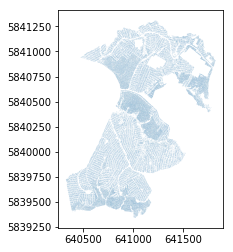

In [8]:
puntos.plot()

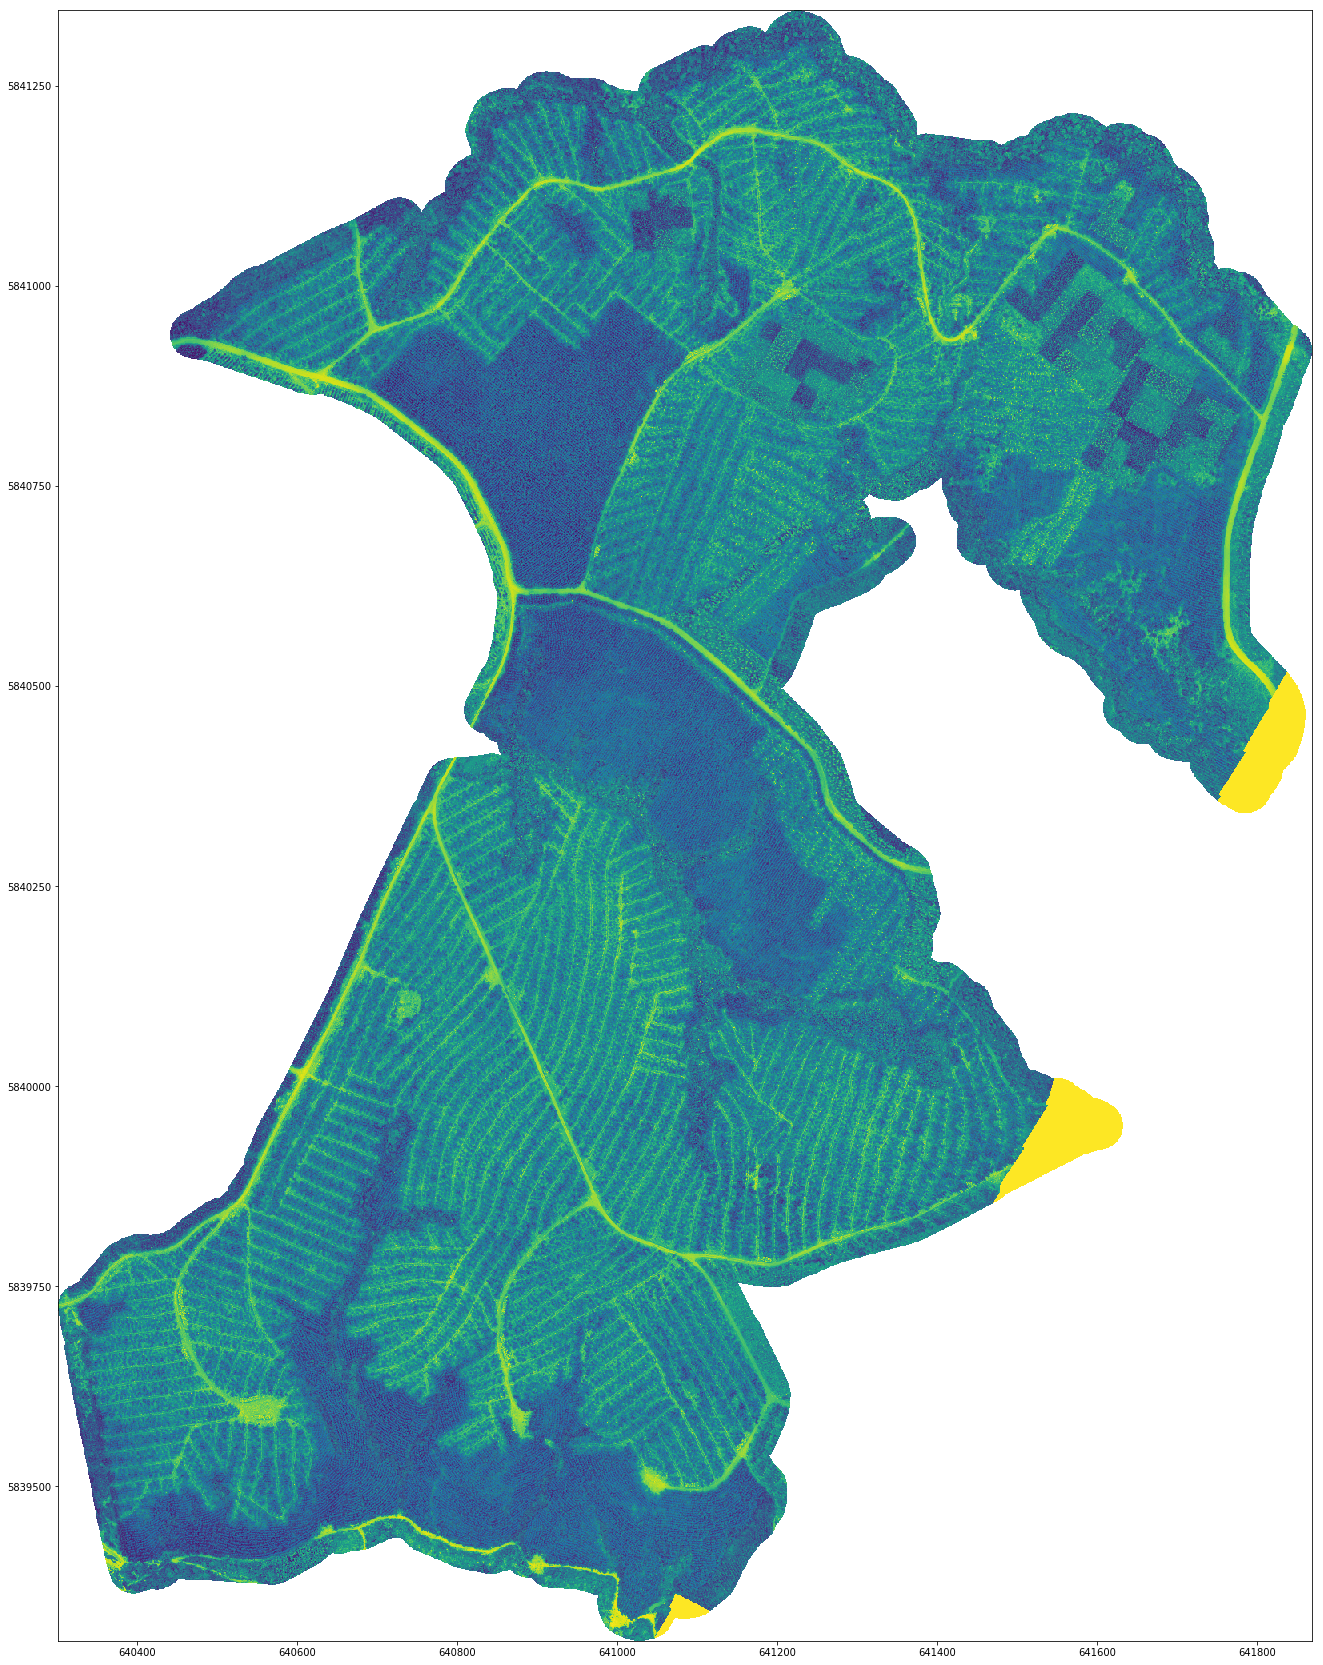

In [9]:
fig, ax = plt.subplots(figsize=(30,30))
rasterio.plot.show(raster, ax=ax)
puntos.plot(ax=ax)
plt.savefig("mapa_puntos"+url_dataset.replace("/",""))

## Rotar Puntos

In [8]:
# puntos = gpd.read_file(shp)
# x= 761774.565
# y= 5881886.945 
# puntos = puntos.rotate(-48.01,origin=(761774.565,5881886.945))
# puntos.to_file(driver = 'ESRI Shapefile', filename = "puntos_rotados")
# puntos.plot()

## Cargar Mapa Densidad

In [9]:
# # inicialemnte correr notebook mapa_densidad
# mapa_densidad = np.load(url_salida+"/mapa_densidad" + '.npy')
# print(np.sum(mapa_densidad),puntos.shape[0])

## Mapa densidad a shapefile

In [10]:
# output_file = 'density_map_final_final.shp'
# utilidades.array_to_shp(mapa_densidad,raster,output_file)

In [11]:
# ruta_1m = "D:/Memoria/Codigo/AraucoNursery/PROYECTOS/cortes/1m.png"
# mapa_densidad=mpimg.imread(ruta_1m)

In [12]:
puntos.shape

(47519, 6)

## Generar mapa Densidad Con Gaussiana

In [13]:
# coordenadas,pixeles = utilidades.get_coordenadas(raster,puntos,url_salida,"pixeles")

In [14]:
# mapa_densidad = utilidades.get_density_map_gaussian(coordenadas,raster.height,raster.width,sigma=1)

## Generar mapa Densidad Con Mascara Puntos

In [10]:
coordenadas = utilidades.obtencion_pixeles_exteriores(raster,puntos)

In [95]:
len(coordenadas)

99969

In [11]:
mapa_densidad = utilidades.generar_mapa_probabilidad(raster,coordenadas,desfase=1)

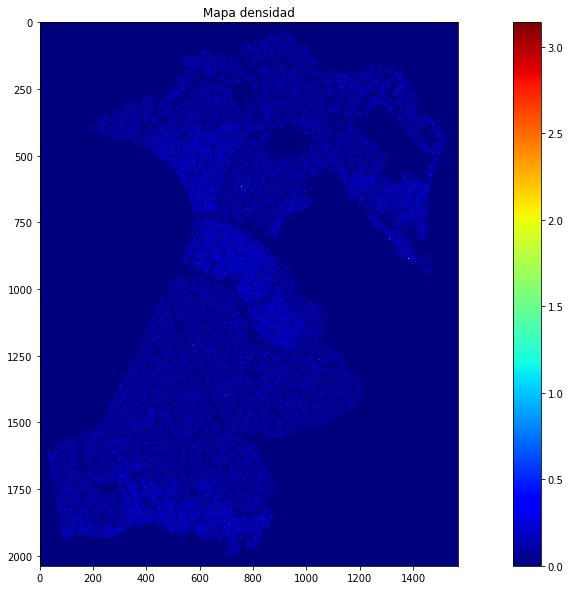

In [12]:
plt.figure(figsize=(20,10))

plt.imshow(mapa_densidad,cmap = CM.jet)
plt.title('Mapa densidad')
plt.colorbar()
plt.savefig("mapa_densidad"+url_dataset.replace("/",""))
plt.show()


In [141]:
np.sum(mapa_densidad),puntos.shape[0]

(99968.9999999999, 99979)

In [142]:
np.abs(np.sum(mapa_densidad)-puntos.shape[0])

10.000000000101863

In [14]:
offsetX = 0
offsetY = 0


# step = 128
# width = step
# height = step


width = 64
height = 64
step = int(width/4)

nulo = [65535]
#lista de imagenes
lista_imagenes = []
#lista del conteo
lista_etiquetas = []
#lista de los mapas de densidad
lista_mapa = []
contador = 0
colores = list({name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS})

## Muestra de los cortes a realizar

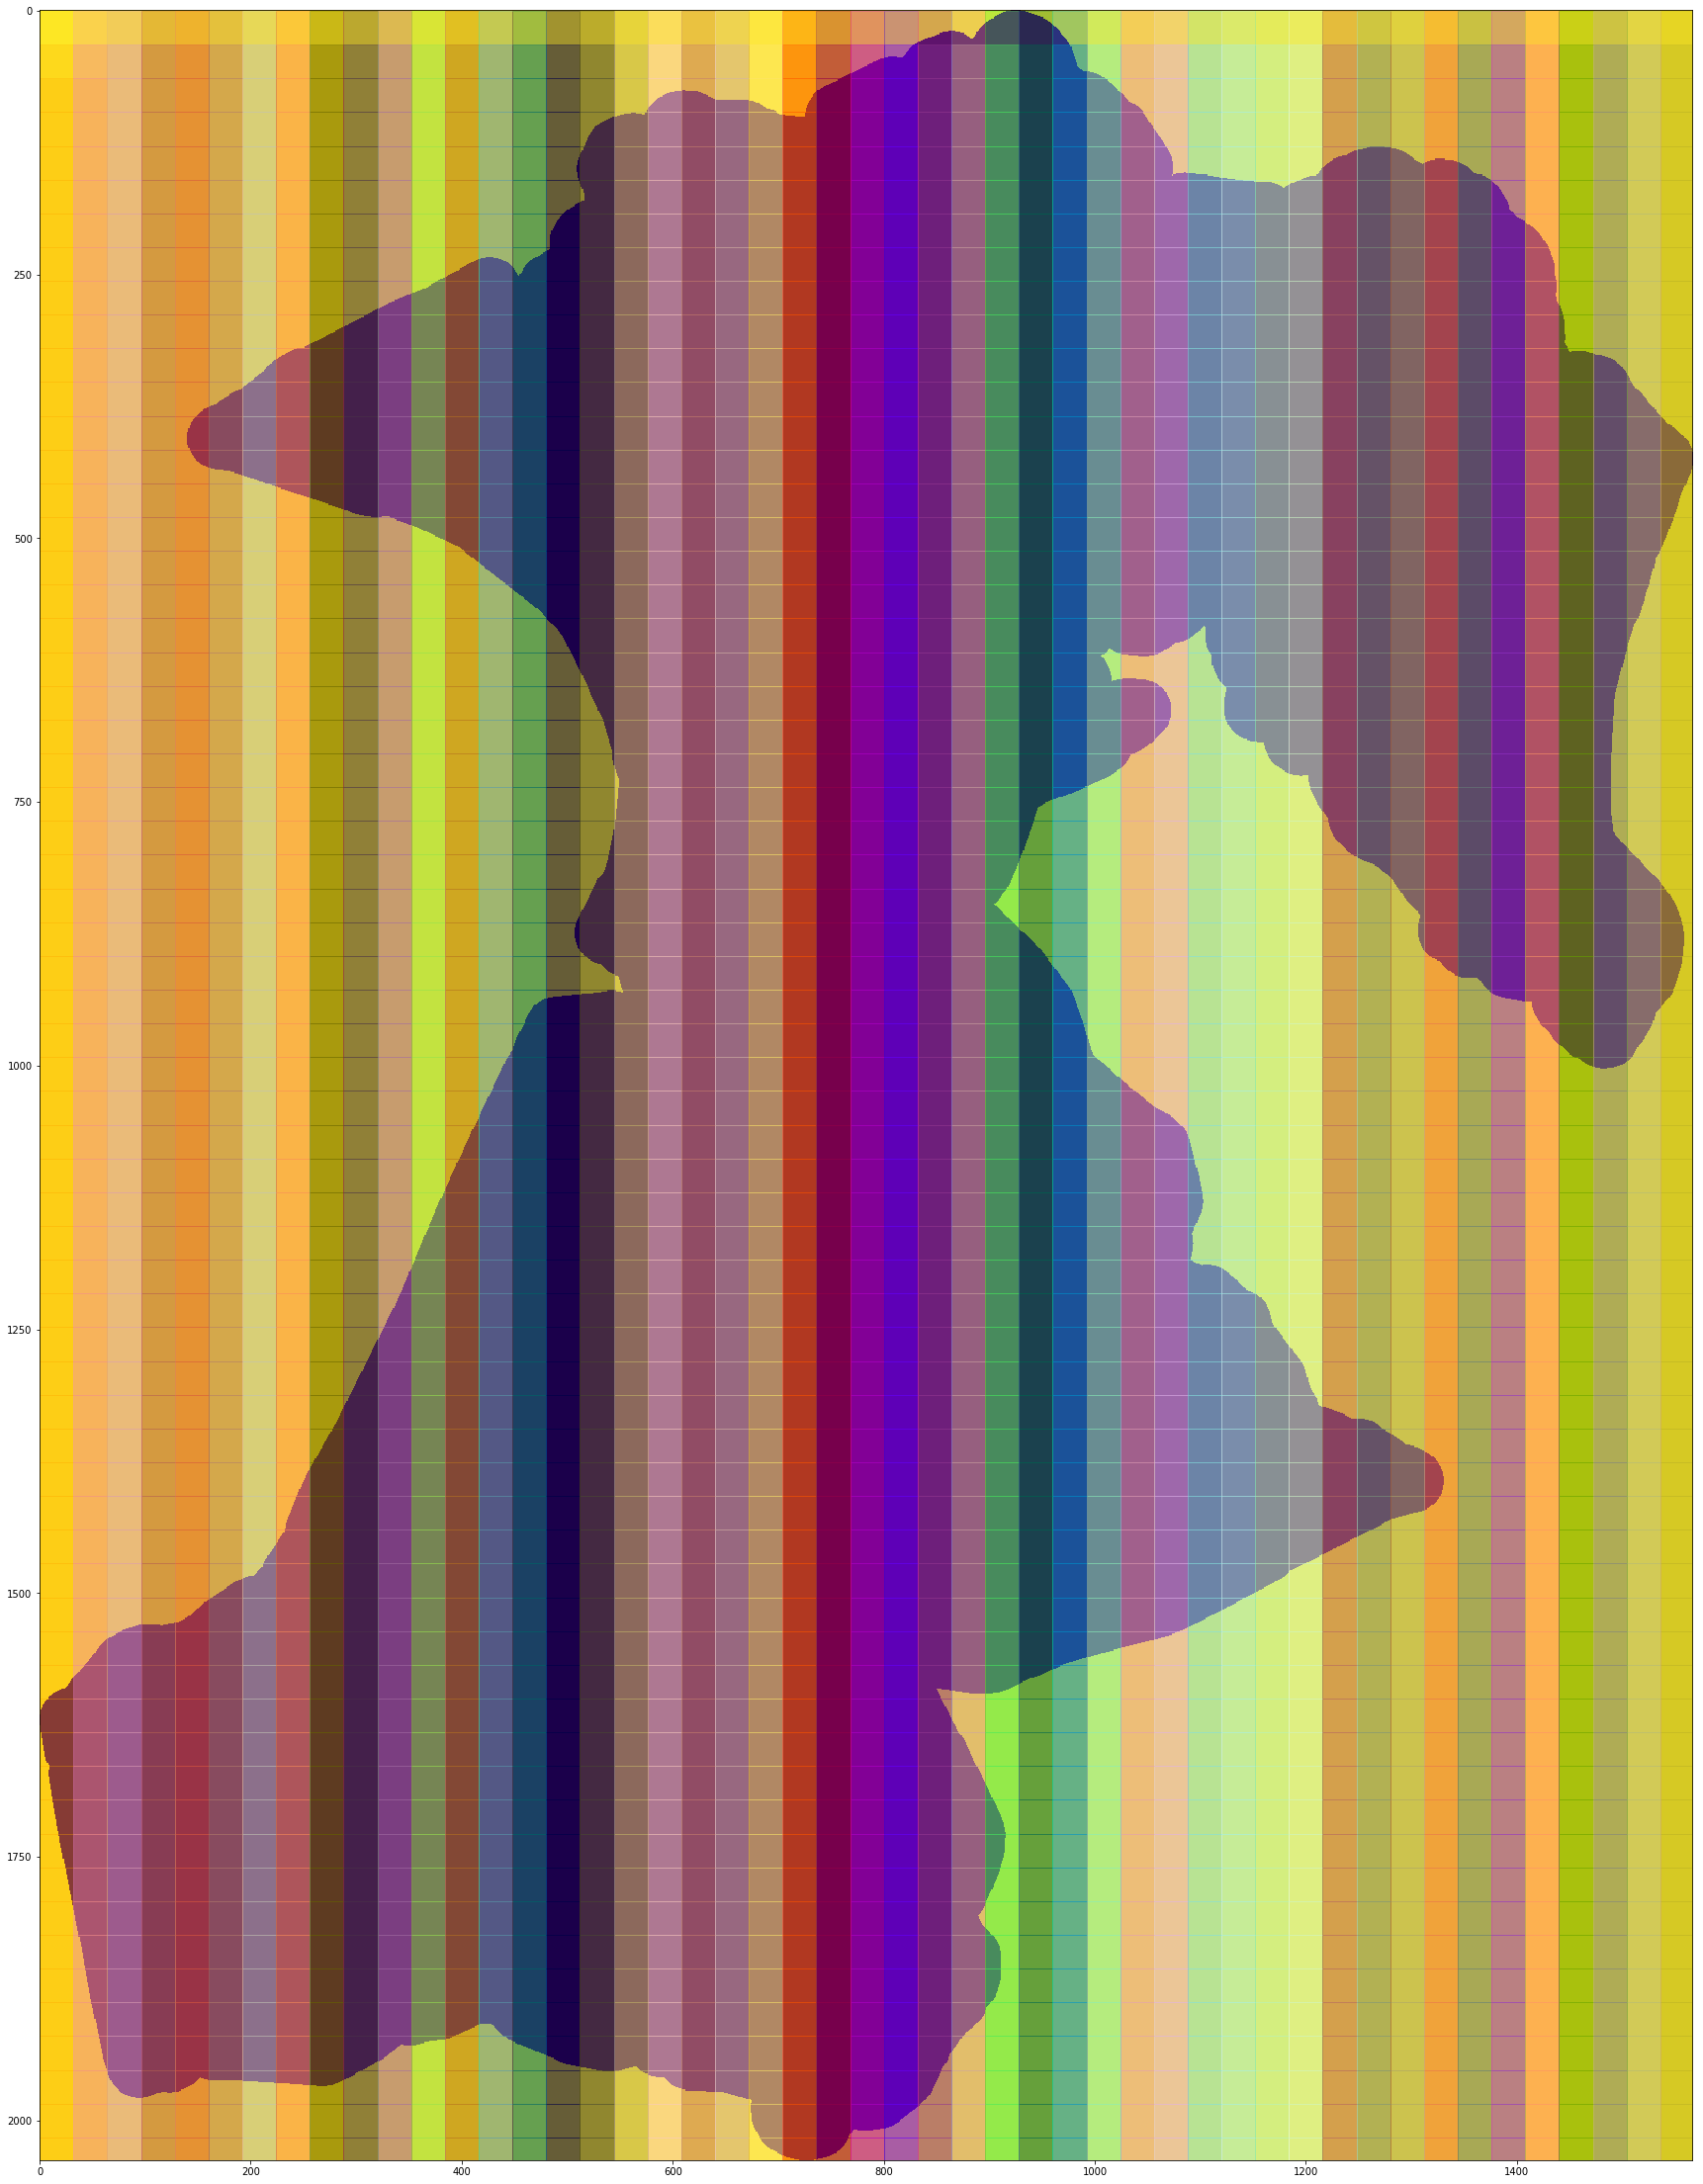

In [118]:
windows_list = []
datos_b1 = raster.read(2)
plt.figure(figsize=(40,40))
plt.imshow(datos_b1)
ax = plt.gca()
while (1):
    # print(offsetY,offsetX,widthX,widthY)
    i_color = (contador)%len(colores)
    offsetX = offsetX + step 
    
     # finalizar si se a recorrido toda la imagen
    if(offsetY >= raster.height and offsetX >= raster.width):
        break
     #cuando llegue al borde en el eje x, debo bajar(sumar en eje y) y debo volver a empezar setear offsetX en 0 y widthX en 100
    elif(offsetX >= raster.width):
        offsetY = offsetY + step
        offsetX = 0
        
    windows_list.append(windows.Window(offsetX,offsetY,width,height))
    ax.add_patch(Rectangle((windows_list[contador].col_off,windows_list[contador].row_off),
                       width=windows_list[contador].width,
                       height=windows_list[contador].height,fill=True,alpha=.2,
                 color=colores[i_color]))
    contador = contador + 1

## Proceso Cortado

In [15]:
%%time
contador = 0
out_meta = raster.meta.copy()
while (1):
        # finalizar si se a recorrido toda la imagen
    if(offsetY >= raster.height and offsetX >= raster.width):
        break
     #cuando llegue al borde en el eje x, debo bajar(sumar en eje y) y debo volver a empezar setear offsetX en 0 y widthX en 100
    elif(offsetX >= raster.width):
        offsetY = offsetY + step
        offsetX = 0
        
    #entregamos los pixeles para obtener las coordenadas
    t = raster.xy(offsetX, offsetY)
    r = raster.xy(offsetX + width , offsetY)
    l = raster.xy(offsetX, offsetY + height)
    b = raster.xy(offsetX + width , offsetY + height)
    minx = min(t[0],l[0],b[0],t[0])
    maxx = max(t[0],l[0],b[0],t[0])
    miny = min(t[1],l[1],b[1],t[1])
    maxy = max(t[1],l[1],b[1],t[1])
    bbox = box(minx, miny, maxx, maxy)  
    
    try:

        #transformacion de la imagen
        out_img, out_transform = mask(raster, shapes=[bbox], crop=True)
        out_png = out_img[0:3,0:width,1:height+1]
        out_png[out_png > 255]=255

        #actual z,x,y
        #en caso den transponer
        out_png = np.transpose(out_png, (1, 2, 0))
#         print(out_png.shape)
        if(out_png.shape != ( width, height,3)):
            offsetX = offsetX + step
            continue 
#         out_png[out_png > 255] = 0
#         out_meta.update({"driver": "GTiff",
#                             "height": 100,
#                             "width": 100,
#                             "transform": out_transform,
#                             "crs": raster.crs})
        
#         #corte mapa densidad
        corte= mapa_densidad[offsetX: offsetX + width , offsetY : offsetY + height]
        
        
#         interseccion ptos
        interseccion = puntos["geometry"].intersects(bbox)
        puntos_por_imagen = puntos[interseccion]
        cantidad = interseccion.value_counts()

        if(True in cantidad.index):
            numero = cantidad[True]
#             scipy.misc.imsave(carpeta_mapa+'mapa'+str(contador)+'.png', out_png)
#             scipy.misc.imsave(carpeta_densidad+'mapa'+str(contador)+'.png', corte)
#             with rasterio.open('{}/salida{}.tif'.format(url_salida_tiff,contador),"w",**out_meta) as dest:
#                 dest.write(out_img)
            lista_imagenes.append(out_png)
            lista_mapa.append(corte)
            lista_etiquetas.append(np.sum(corte))
#         lista_etiquetas.append(numero)
            contador = contador + 1
        else:
            numero = 0

#         lista_imagenes.append(out_png)
#         lista_mapa.append(corte)
#         lista_etiquetas.append(np.sum(corte))
# #         lista_etiquetas.append(numero)
#         contador = contador + 1

    except ValueError:
        pass
    offsetX = offsetX + step 

CPU times: user 1h 2min 25s, sys: 1.9 s, total: 1h 2min 27s
Wall time: 1h 2min 28s


In [16]:
len(lista_imagenes)

5418

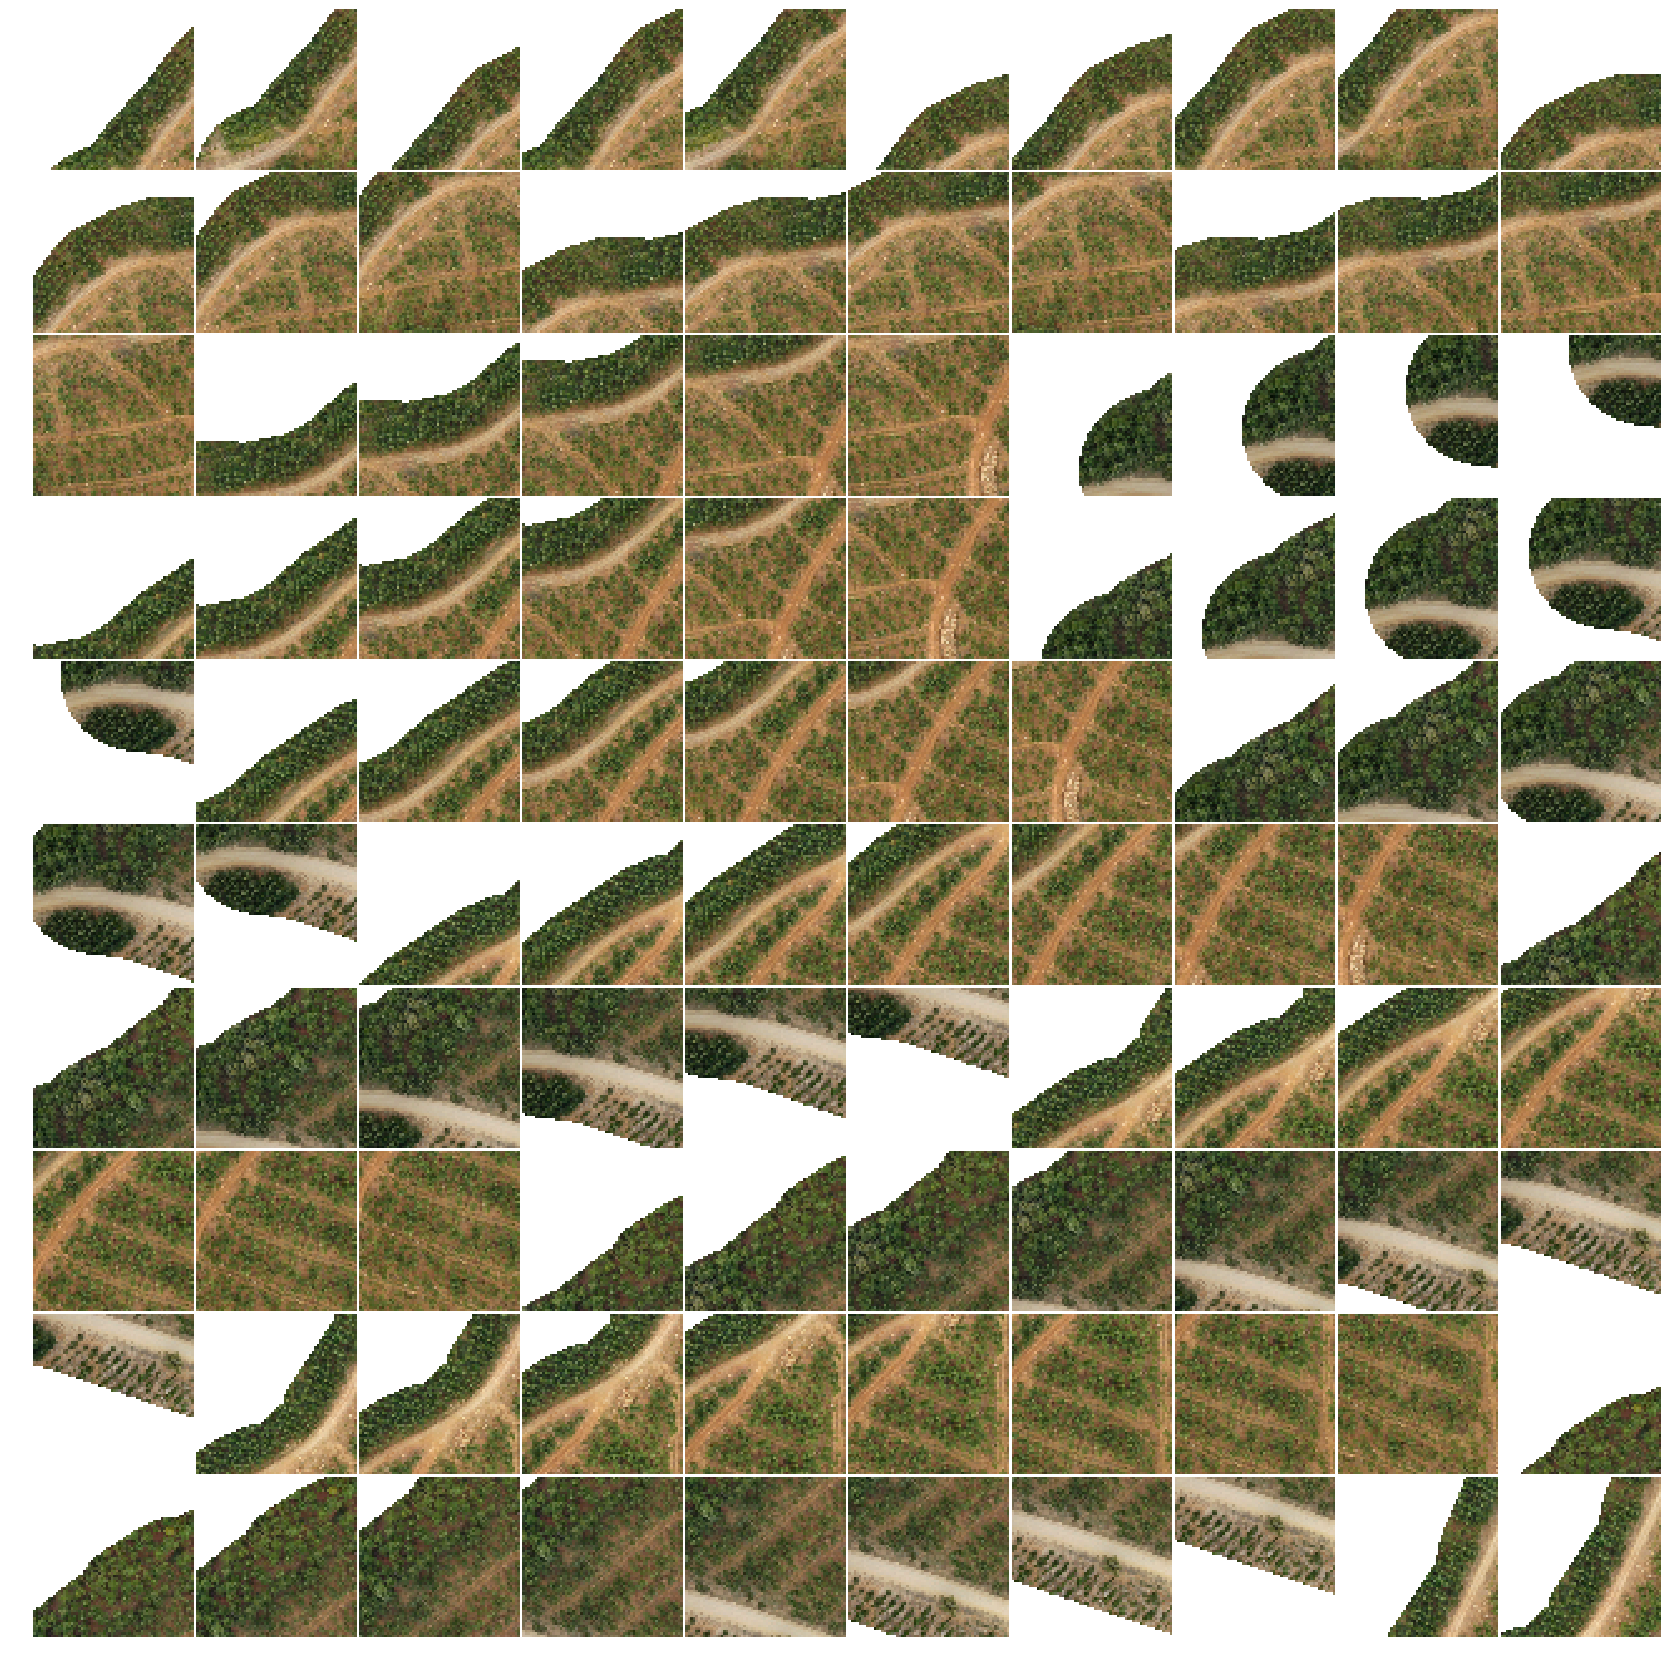

In [17]:
suma = 100
base = 0
utilidades.vis_square(utilidades.list_to_np_array(lista_imagenes[base:base+suma]))

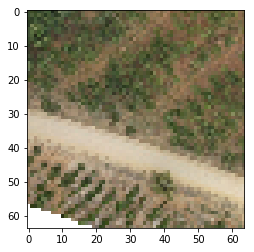

In [18]:
plt.figure()
plt.imshow(lista_imagenes[95])

In [74]:
#unique, counts = np.unique(lista_imagenes[1270][:90,110:,:], return_counts=True)
#print(np.asarray((unique, counts)).T)

In [19]:
n_lista_imagenes = len(lista_imagenes)
n_lista_etiquetas = len(lista_etiquetas)
n_lista_mapa = len(lista_mapa)

lista_imagenes = np.array(lista_imagenes)
lista_etiquetas = np.array(lista_etiquetas)
lista_mapa = np.array(lista_mapa)

In [20]:
HEIGHT = height
WIDTH = width
CHANNELS = 3
factor_reduccion= 4

In [59]:
n_lista_imagenes,HEIGHT, WIDTH, CHANNELS

(5418, 64, 64, 3)

In [60]:
densidades = utilidades.reduccion_mapa(lista_mapa,4)

In [25]:
lista_imagenes.shape

(5418, 64, 64, 3)

In [26]:
archivo_h5_mapa = url_salida+url_dataset.replace("/","-")+str(WIDTH)+'X'+str(HEIGHT)+'.h5'
hf = h5py.File(archivo_h5_mapa, 'w')

In [27]:
%%time
Xset = hf.create_dataset(
        name= "images",
        data=lista_imagenes,
        shape=(n_lista_imagenes,HEIGHT, WIDTH, CHANNELS),
        compression="gzip",
        compression_opts=9)

CPU times: user 4min 15s, sys: 736 ms, total: 4min 16s
Wall time: 4min 28s


In [28]:
%%time
Yset = hf.create_dataset(
        name= "density",
        data=lista_mapa,
        shape=(n_lista_mapa,HEIGHT,WIDTH),
        compression="gzip",
        compression_opts=9)

CPU times: user 21.2 s, sys: 44.1 ms, total: 21.3 s
Wall time: 22.4 s


In [29]:
%%time
Zset = hf.create_dataset(
        name= "counts",
        data=lista_etiquetas,
        shape=(n_lista_etiquetas,),
        compression="gzip",
        compression_opts=9)


CPU times: user 580 µs, sys: 0 ns, total: 580 µs
Wall time: 587 µs


In [30]:
Vset = hf.create_dataset(
        name= "reduced_density",
        data=densidades,
        shape=(n_lista_mapa,HEIGHT/factor_reduccion,WIDTH/factor_reduccion),
        compression="gzip",
        compression_opts=9)

In [31]:
hf.close()

# Revision de los datos

In [87]:
numero = 100
with h5py.File(archivo_h5_mapa, 'r') as hf:
    imagen = hf["images"][numero]
    densidad = hf["density"][numero]
    densidad_chica =hf["reduced_density"][numero]
    cuenta =hf["counts"][numero]

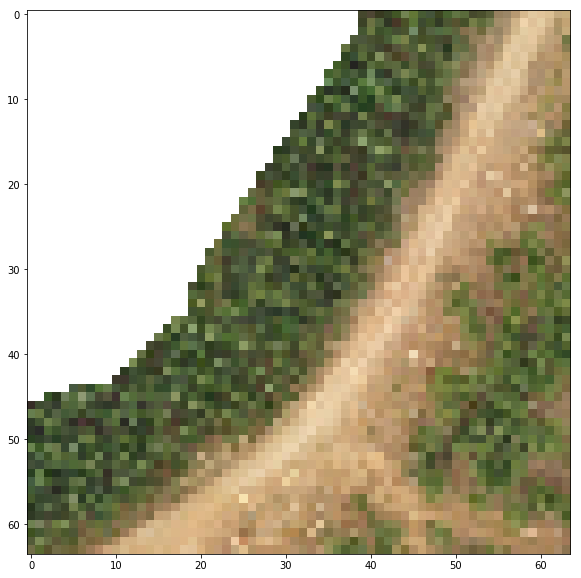

In [88]:
plt.figure(figsize=(10,10))
plt.imshow(imagen)
# plt.imshow(densidad, alpha=0.55)

In [89]:
np.sum(densidad) - cuenta

0.0

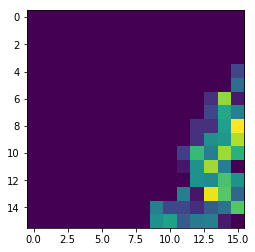

In [90]:
plt.imshow(densidad_chica)

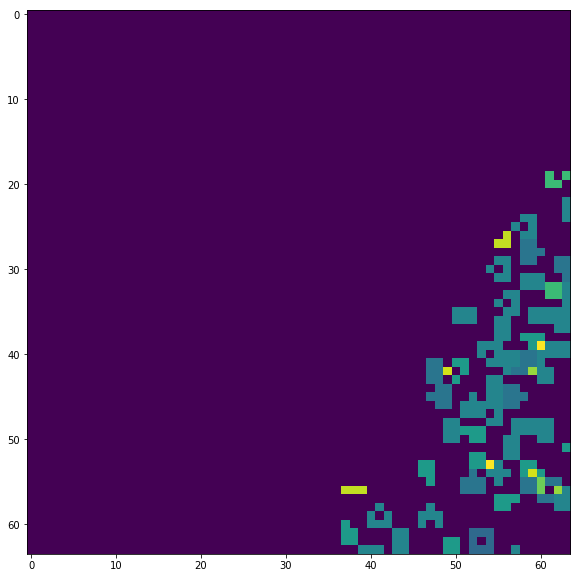

In [92]:
plt.figure(figsize=(10,10))
plt.imshow(densidad)

In [62]:
unique, counts = np.unique(lista_etiquetas, return_counts=True)
#print(np.asarray((unique, counts)).T)

[[5.76000000e+02 1.00000000e+00]
 [5.87000000e+02 1.00000000e+00]
 [6.55583333e+02 1.00000000e+00]
 ...
 [1.79833333e+03 1.00000000e+00]
 [1.79850000e+03 1.00000000e+00]
 [1.80233333e+03 1.00000000e+00]]


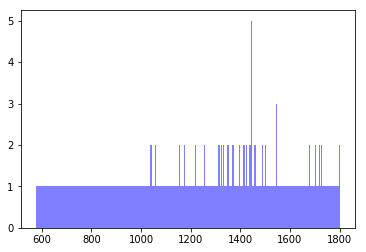

In [63]:
n, bins, patches = plt.hist(lista_etiquetas, unique, facecolor='blue', alpha=0.5)

## prueba mapas densidad

In [85]:
densidades = utilidades.reduccion_mapa(lista_mapa,4)
d = utilidades.reducir_densidad(lista_mapa,4)

Text(0.5, 1.0, 'interpolacion 40.45855654761905')

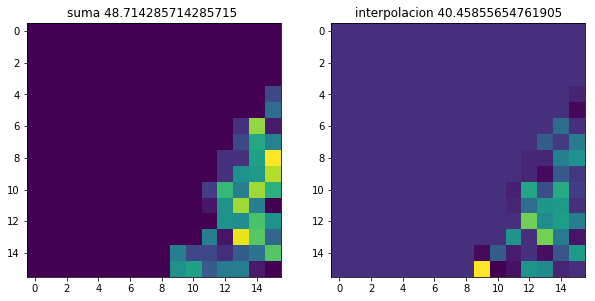

In [86]:
numero = 100
fig = plt.figure(figsize=(10,5))

fig.add_subplot(1,2,1)
plt.imshow(densidades[numero][:,:,0])
plt.title("suma {} ".format(np.sum(densidades[numero])))

fig.add_subplot(1,2,2)
plt.imshow(d[numero][:,:,0])
plt.title("interpolacion {}".format(np.sum(d[numero])))